<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/time_series_analysis/SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('RestaurantVisitors.csv',index_col='date',parse_dates=True)
df.index.freq = 'D'

In [21]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2016-01-01 to 2017-05-31
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       517 non-null    object 
 1   holiday       517 non-null    int64  
 2   holiday_name  517 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 36.4+ KB


In [23]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [24]:
df1 = df.dropna()

In [25]:
df1

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0


In [26]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [27]:
cols = ['rest1', 'rest2', 'rest3','rest4', 'total']

In [28]:
for column in cols:
  df1[column] = df1[column].astype(int)

In [29]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


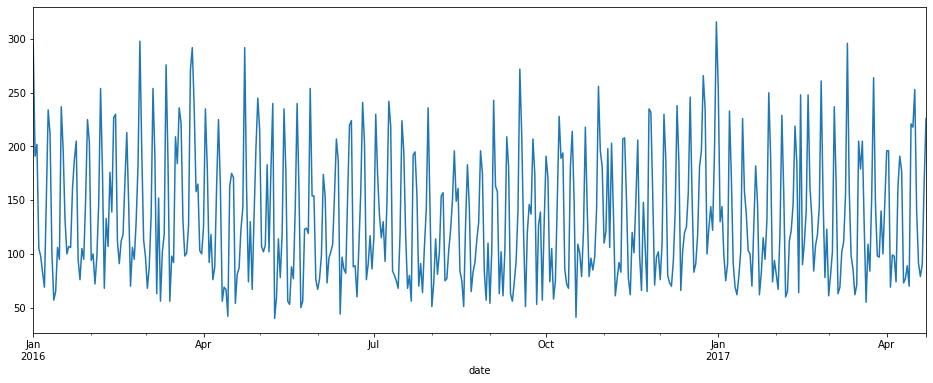

In [30]:
df1['total'].plot(figsize=(16,6))

In [31]:
df1.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

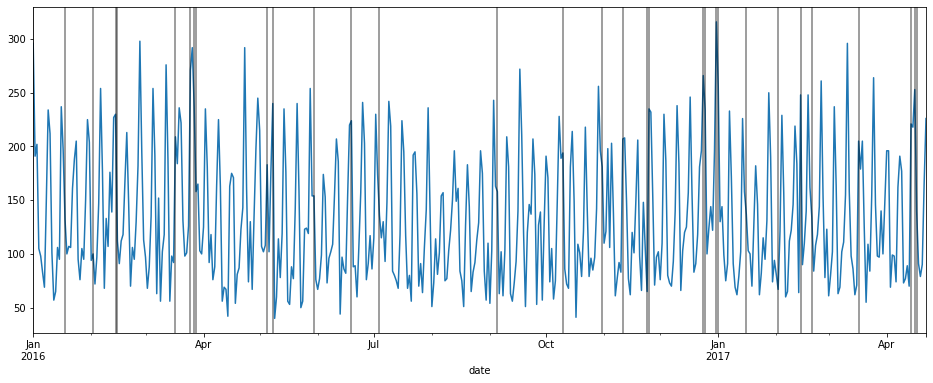

In [32]:
ax = df1['total'].plot(figsize=(16,6))

for day in df1.query('holiday==1').index:
  ax.axvline(x=day,color='black',alpha=0.5);

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

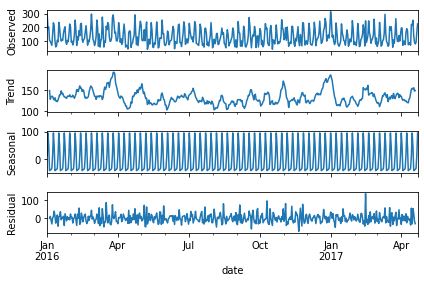

In [34]:
result = seasonal_decompose(df1['total'])
result.plot();

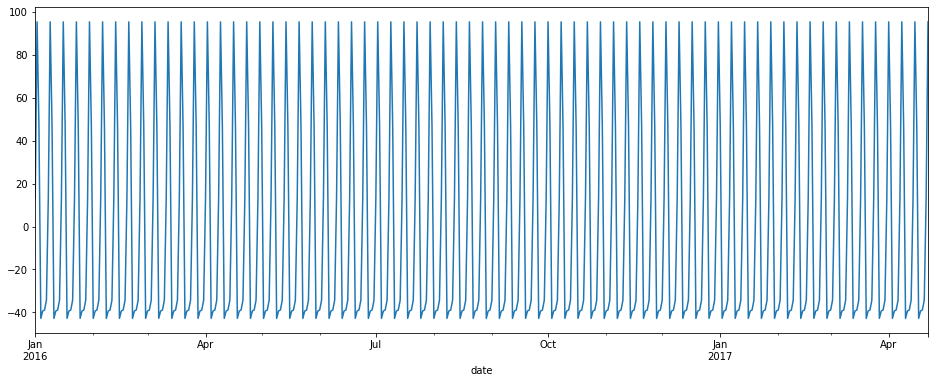

In [35]:
result.seasonal.plot(figsize=(16,6))

In [36]:
len(df1)

478

In [37]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [38]:
!pip install "pmdarima>=1.1.0,<1.1.1" as pm

     |████████████████████████████████| 696kB 6.5MB/s 
  Created wheel for pm: filename=pm-0.1.1-cp37-none-any.whl size=9284 sha256=b3791363e9f3f0c7039f276af6c422af4759df4dfb65f0799d58a31ae26a26ee
  Stored in directory: /root/.cache/pip/wheels/55/e0/0c/7a6356cd6097c4670c6ad74ffcd9b5af47045b73f49917b4df
Successfully built pm


In [39]:
from pmdarima import auto_arima

In [40]:
auto_arima(df1['total'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Sun, 27 Jun 2021   AIC                           4845.442
Time:                                   22:23:54   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5657      4.363      4.714      0.000      12.014      29.117
ar.L1          0.1897      0.045      4.220      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.4032     86.679     16.468      0.000    1257.515    1597.292
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [42]:
#if value_error :non-invertible starting MA parameters found use enforce
model = SARIMAX(train['total'],order=(1,0,0),seasonal_order=(2,0,0,7),
                enforce_invertibility=False)

In [43]:
results = model.fit()

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Sun, 27 Jun 2021   AIC                           4457.403
Time:                                   22:23:55   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
start = len(train)
end = len(train) + len(test) - 1

In [46]:
predictions = results.predict(start,end).rename('SARIMA model')

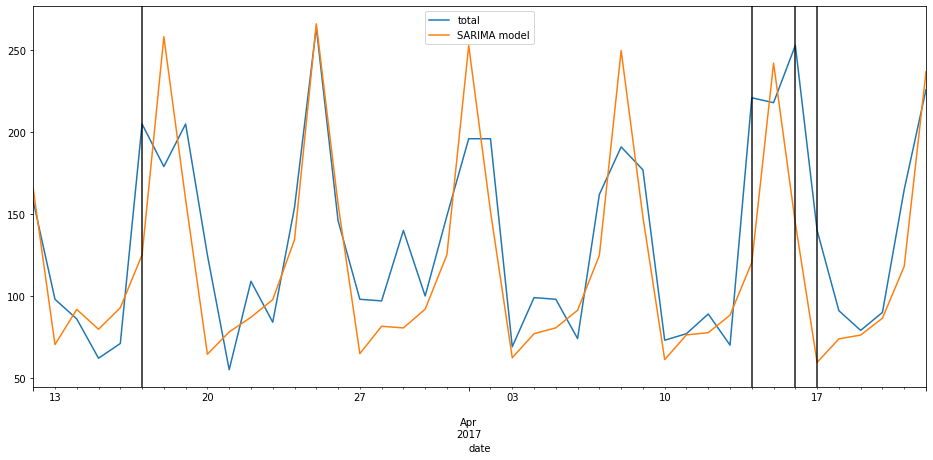

In [47]:
ax = test['total'].plot(legend=True,figsize=(16,7))
predictions.plot(legend=True)

for day in df1.query('holiday==1').index:
  ax.axvline(x=day,color='black',alpha=0.9);

In [48]:
from statsmodels.tools.eval_measures import rmse

In [49]:
error = rmse(test['total'],predictions)

In [50]:
error

41.26315497467325

#SARIMAX model

In [51]:
#x is the exogenous variable like hoilday above 

In [52]:
auto_arima(df1['total'],exogenous=df1[['holiday']],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2348.654
Date:                           Sun, 27 Jun 2021   AIC                           4709.307
Time:                                   22:26:38   BIC                           4734.325
Sample:                                        0   HQIC                          4719.143
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5539      4.274      2.703      0.007       3.178      19.930
x1            74.8311      4.545     16.464      0.000      65.923      83.739
ma.L1          0.1782      0.051      3.474      0.001       0.078       0.279
ar.S.L7        0.5060      0.045     11.234      0.000       0.418       0.594
ar.S.L14       0.3843      0.043      8.983      0.000       0.300       0.468
sigma2      1141.9842     80.187     14.241      0.000     984.820    1299.148
===================================================================================
Ljung-Box (Q):                       85.08   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               0.89   Skew:                             0.12
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
model = SARIMAX(train['total'],exog = train[['holiday']],order=(0,0,1),seasonal_order=(2,0,0,7),enforce_invertibility=False)

In [54]:
result = model.fit()

In [55]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2158.891
Date:                           Sun, 27 Jun 2021   AIC                           4327.783
Time:                                   22:29:28   BIC                           4348.171
Sample:                               01-01-2016   HQIC                          4335.829
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       67.9536      4.278     15.886      0.000      59.570      76.338
ma.L1          0.2057      0.050      4.117      0.000       0.108       0.304
ar.S.L7        0.5146      0.042     12.369      0.000       0.433       0.596
ar.S.L14       0.4598      0.041     11.135      0.000       0.379       0.541
sigma2      1118.0369     73.446     15.223      0.000     974.086    1261.987
===================================================================================
Ljung-Box (Q):                      101.65   Jarque-Bera (JB):                 1.29
Prob(Q):                              0.00   Prob(JB):                         0.52
Heteroskedasticity (H):               0.90   Skew:                             0.11
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
start = len(train)
end = len(train) + len(test) - 1  

In [58]:
predictions = result.predict(start,end,exog=test[['holiday']]).rename('Sarimax with exog')

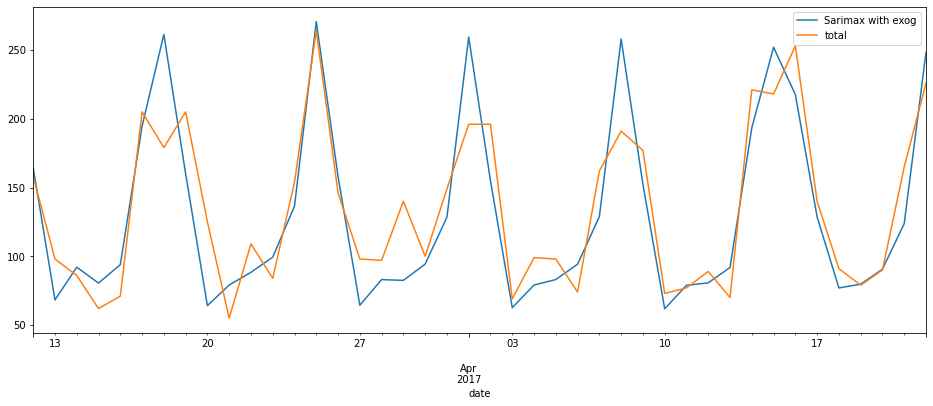

In [59]:
predictions.plot(figsize=(16,6),legend=True)
test['total'].plot(legend=True)

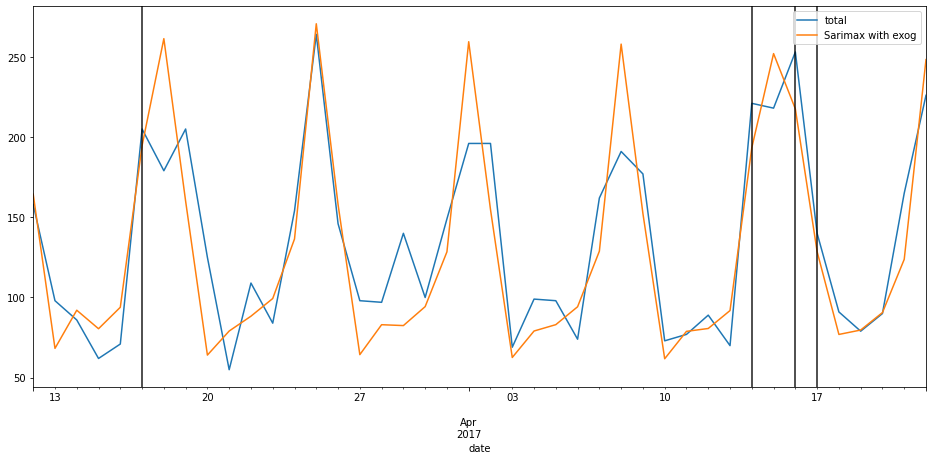

In [62]:
ax = test['total'].plot(legend=True,figsize=(16,7))
predictions.plot(legend=True)

for day in test.query('holiday==1').index:
  ax.axvline(x=day,color='black',alpha=0.9);

In [63]:
rmse(test['total'],predictions)

31.09252127339789

In [64]:
model = SARIMAX(df1['total'],exog=df1[['holiday']],order=(0,0,1),seasonal_order=(2,0,0,7),enforce_invertibility=False)

In [65]:
result1 = model.fit()

In [67]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [73]:
exog_forecast = df[478:][['holiday']]

In [74]:
exog_forecast

,holiday
date,
2017-04-23,0
2017-04-24,0
2017-04-25,0
2017-04-26,0
2017-04-27,0
2017-04-28,0
2017-04-29,0
2017-04-30,0
2017-05-01,0


In [75]:
fcast = result1.predict(len(df1),len(df1)+38,exog=exog_forecast).rename('sarima final forecast')

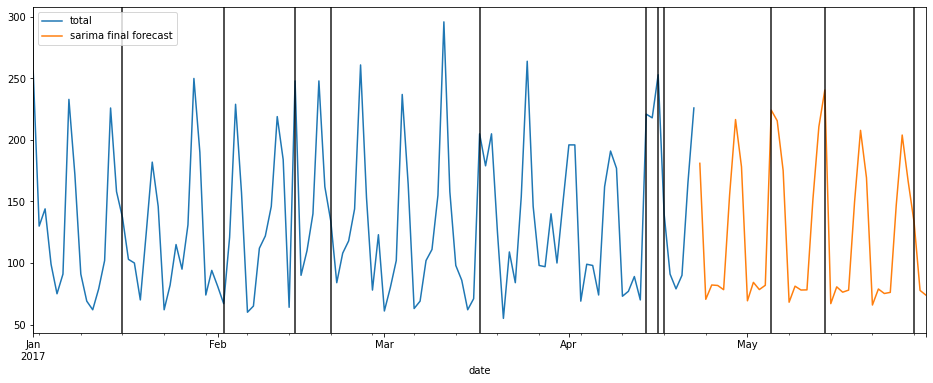

In [80]:
ax = df1['total'].loc['2017-01-01':].plot(figsize=(16,6),legend=True)
fcast.plot(legend=True)

for day in df.query('holiday==1').index:
  ax.axvline(x=day,color='black',alpha=0.9);